In [1]:
import keras
from keras import layers
import numpy as np
import os
import shutil

Using TensorFlow backend.


In [2]:
base_dir = './dataset/cat_dog'
train_dir = os.path.join(base_dir , 'train')
train_dir_dog = os.path.join(train_dir , 'dog')
train_dir_cat = os.path.join(train_dir , 'cat')

test_dir = os.path.join(base_dir , 'test')
test_dir_dog = os.path.join(test_dir , 'dog')
test_dir_cat = os.path.join(test_dir , 'cat')
dc_dir = './dataset/dc/train'

In [3]:
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(train_dir_dog)
    os.mkdir(train_dir_cat)
    os.mkdir(test_dir)
    os.mkdir(test_dir_dog)
    os.mkdir(test_dir_cat)

    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        s = os.path.join(dc_dir, fname)
        d = os.path.join(train_dir_cat, fname)
        shutil.copyfile(s, d)

    fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        s = os.path.join(dc_dir, fname)
        d = os.path.join(test_dir_cat, fname)
        shutil.copyfile(s, d)

    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        s = os.path.join(dc_dir, fname)
        d = os.path.join(train_dir_dog, fname)
        shutil.copyfile(s, d)

    fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
    for fname in fnames:
        s = os.path.join(dc_dir, fname)
        d = os.path.join(test_dir_dog, fname)
        shutil.copyfile(s, d)

(1) 读取图片

（2）将图片解码

（3）预处理图片，大小

（4）图片归一化

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [47]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,      
                                  height_shift_range=0.2,
                                  brightness_range=(0.6, 1),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

In [48]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(200, 200),
                                                    batch_size=20,
                                                    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

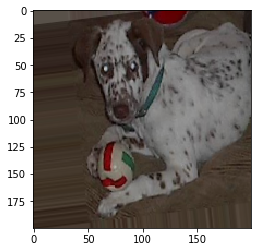

In [50]:
for im_batch in train_generator:
    for im in im_batch:
        plt.imshow(im[0])
        break
    break

In [13]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(200, 200),
                                                    batch_size=20,
                                                    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [18]:
model = keras.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation="relu", input_shape=(200, 200, 3)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 94, 94, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 64)        0         
__________

In [20]:
model.compile(optimizer=keras.optimizers.Adam(lr),
              loss='binary_crossentropy',
              metrics=['acc']
)

In [21]:
history = model.fit_generator(
    train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data=test_generator,
    validation_steps=50
)

Epoch 1/30
 17/100 [====>.........................] - ETA: 4:26 - loss: 0.7037 - acc: 0.4794

KeyboardInterrupt: 

In [ ]:
keras.optimizers